# Comparing model responses
This notebook provides sample [EDSL](https://docs.expectedparrot.com/en/latest/) code for comparing content created by different language models and examining how models rate their own content versus content created by other models. 

In a series of steps we use surveys to prompt models to generate some content and then evaluate each piece of content, and then analyze the results as datasets.

Before running this notebook please see details on [installing EDSL](https://docs.expectedparrot.com/en/latest/installation.html) and [getting started](https://docs.expectedparrot.com/en/latest/tutorial_getting_started.html) using the library.

In [1]:
# ! pip install edsl

## Generating content
We start by constructing a question that will prompt a language model to generate some content. EDSL comes with a variety of standard question types (multiple choice, free text, etc.) that we can select based on the desired format of the response. See [examples of all question types](https://docs.expectedparrot.com/en/latest/questions.html#question-type-classes). Here we use `QuestionFreeText` to generate some text:

In [2]:
from edsl.questions import QuestionFreeText

q_content = QuestionFreeText(
    question_name = "content",
    question_text = "Draft a sentence summarizing best practices for conducting research with large language models."
)

## Selecting language models
Next we can select language models to answer the question. We can check a current list of available models:

In [3]:
from edsl import Model

Model.available() 

[['01-ai/Yi-34B-Chat', 'deep_infra', 0],
 ['Austism/chronos-hermes-13b-v2', 'deep_infra', 1],
 ['Gryphe/MythoMax-L2-13b', 'deep_infra', 2],
 ['Gryphe/MythoMax-L2-13b-turbo', 'deep_infra', 3],
 ['HuggingFaceH4/zephyr-orpo-141b-A35b-v0.1', 'deep_infra', 4],
 ['Phind/Phind-CodeLlama-34B-v2', 'deep_infra', 5],
 ['bigcode/starcoder2-15b', 'deep_infra', 6],
 ['bigcode/starcoder2-15b-instruct-v0.1', 'deep_infra', 7],
 ['claude-3-haiku-20240307', 'anthropic', 8],
 ['claude-3-opus-20240229', 'anthropic', 9],
 ['claude-3-sonnet-20240229', 'anthropic', 10],
 ['codellama/CodeLlama-34b-Instruct-hf', 'deep_infra', 11],
 ['codellama/CodeLlama-70b-Instruct-hf', 'deep_infra', 12],
 ['cognitivecomputations/dolphin-2.6-mixtral-8x7b', 'deep_infra', 13],
 ['databricks/dbrx-instruct', 'deep_infra', 14],
 ['deepinfra/airoboros-70b', 'deep_infra', 15],
 ['gemini-pro', 'google', 16],
 ['google/codegemma-7b-it', 'deep_infra', 17],
 ['google/gemma-1.1-7b-it', 'deep_infra', 18],
 ['gpt-3.5-turbo', 'openai', 19],


We select models to use by creating `Model` objects that we add to our question when we run it. (If we do not specify a model, GPT 4 preview will be used by default.) Here we select 4 models to use with our question:

In [4]:
models = [Model(m) for m in ('gpt-3.5-turbo',
                             'gpt-4',
                             'gpt-4o',
                             'gemini-pro',
                             'claude-3-sonnet-20240229')]

## Generating responses
We generate responses to questions by passing them to a `Survey` object, adding the models, and then calling the `run` method. This produces a `Results` object with a `Result` for set of responses:

In [5]:
from edsl import Survey 

# Pass a list of one ore more questions to be administered together in the survey 
survey = Survey([q_content]) 

# Run the survey with the models
results = survey.by(models).run()

The results include information about all the components of the response that we can analyze. We can see a list of these components:

In [6]:
results.columns

['agent.agent_instruction',
 'agent.agent_name',
 'answer.content',
 'iteration.iteration',
 'model.frequency_penalty',
 'model.logprobs',
 'model.maxOutputTokens',
 'model.max_tokens',
 'model.model',
 'model.presence_penalty',
 'model.stopSequences',
 'model.temperature',
 'model.topK',
 'model.topP',
 'model.top_logprobs',
 'model.top_p',
 'prompt.content_system_prompt',
 'prompt.content_user_prompt',
 'question_options.content_question_options',
 'question_text.content_question_text',
 'question_type.content_question_type',
 'raw_model_response.content_raw_model_response']

## Working with results
EDSL comes with [built-in methods for analyzing results](https://docs.expectedparrot.com/en/latest/results.html) in data tables, dataframes and other formats. For example, we can select and print individual components in a table:

In [7]:
results.select("model", "content").print(format="rich")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ model                    ┃ answer                                                                               ┃
┃ .model                   ┃ .content                                                                             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gpt-3.5-turbo            │ When conducting research with large language models, it is important to clearly      │
│                          │ define research goals, use diverse datasets for training, evaluate model performance │
│                          │ across various metrics, and ensure ethical considerations are addressed throughout   │
│                          │ the research process.                                                                │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ gpt-4                    │ Best practices for conducting research with large language models include ensuring   │
│                          │ data quality and diversity, understanding model limitations, applying appropriate    │
│                          │ evaluation metrics, ethical considerations, and ongoing monitoring for model         │
│                          │ performance and bias mitigation.                                                     │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ gpt-4o                   │ Best practices for conducting research with large language models include ensuring   │
│                          │ data privacy, maintaining transparency in methodology, validating results through    │
│                          │ peer review, and considering ethical implications of the research outcomes.          │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ gemini-pro               │ When conducting research with large language models, it's important to use diverse   │
│                          │ and representative datasets, carefully evaluate model outputs, and consider          │
│                          │ potential biases and limitations.                                                    │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ claude-3-sonnet-20240229 │ When conducting research with large language models, it is important to carefully    │
│                          │ curate the training data to avoid biases, establish clear guidelines for responsible │
│                          │ and ethical use, rigorously evaluate the model's outputs for accuracy and potential  │
│                          │ harms, and transparently communicate the model's capabilities and limitations.       │
└──────────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘

Here we access them as a dataframe:

In [8]:
df_model_content = results.to_pandas(remove_prefix=True)[["model", "content"]]
df_model_content

,model,content
0,gpt-3.5-turbo,When conducting research with large language m...
1,gpt-4,Best practices for conducting research with la...
2,gpt-4o,Best practices for conducting research with la...
3,gemini-pro,When conducting research with large language m...
4,claude-3-sonnet-20240229,When conducting research with large language m...


## Evaluating models
We can use the models' responses as options to a new question prompting the models to select the best response. Here we isolate the responses to the original question:

In [9]:
content_options = results.select("content").to_list()
content_options

['When conducting research with large language models, it is important to clearly define research goals, use diverse datasets for training, evaluate model performance across various metrics, and ensure ethical considerations are addressed throughout the research process.',
 'Best practices for conducting research with large language models include ensuring data quality and diversity, understanding model limitations, applying appropriate evaluation metrics, ethical considerations, and ongoing monitoring for model performance and bias mitigation.',
 'Best practices for conducting research with large language models include ensuring data privacy, maintaining transparency in methodology, validating results through peer review, and considering ethical implications of the research outcomes.',
 "When conducting research with large language models, it's important to use diverse and representative datasets, carefully evaluate model outputs, and consider potential biases and limitations.",
 "Whe

And here we use them as `question_options` to a new question prompting the models to vote:

In [10]:
from edsl.questions import QuestionMultipleChoice

q_best = QuestionMultipleChoice(
    question_name = "best",
    question_text = """Select the best response to this prompt:
    'Draft a sentence summarizing best practices for conducting research with large language models'""",
    question_options = content_options
)

In [11]:
best_results = q_best.by(models).run()

In [12]:
best_results.select("model", "best").print(format="rich")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ model                    ┃ answer                                                                               ┃
┃ .model                   ┃ .best                                                                                ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gpt-3.5-turbo            │ When conducting research with large language models, it is important to carefully    │
│                          │ curate the training data to avoid biases, establish clear guidelines for responsible │
│                          │ and ethical use, rigorously evaluate the model's outputs for accuracy and potential  │
│                          │ harms, and transparently communicate the model's capabilities and limitations.       │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ gpt-4                    │ Best practices for conducting research with large language models include ensuring   │
│                          │ data quality and diversity, understanding model limitations, applying appropriate    │
│                          │ evaluation metrics, ethical considerations, and ongoing monitoring for model         │
│                          │ performance and bias mitigation.                                                     │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ gpt-4o                   │ Best practices for conducting research with large language models include ensuring   │
│                          │ data quality and diversity, understanding model limitations, applying appropriate    │
│                          │ evaluation metrics, ethical considerations, and ongoing monitoring for model         │
│                          │ performance and bias mitigation.                                                     │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ gemini-pro               │ When conducting research with large language models, it is important to clearly      │
│                          │ define research goals, use diverse datasets for training, evaluate model performance │
│                          │ across various metrics, and ensure ethical considerations are addressed throughout   │
│                          │ the research process.                                                                │
├──────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────┤
│ claude-3-sonnet-20240229 │ When conducting research with large language models, it is important to carefully    │
│                          │ curate the training data to avoid biases, establish clear guidelines for responsible │
│                          │ and ethical use, rigorously evaluate the model's outputs for accuracy and potential  │
│                          │ harms, and transparently communicate the model's capabilities and limitations.       │
└──────────────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘

## Analyzing results
Here we merge our results datasets to get a quick tally of votes for each model's content:

In [13]:
df_best_content = best_results.to_pandas(remove_prefix=True)
df_best_content = df_best_content[["model", "best"]]
df_best_content

,model,best
0,gpt-3.5-turbo,When conducting research with large language m...
1,gpt-4,Best practices for conducting research with la...
2,gpt-4o,Best practices for conducting research with la...
3,gemini-pro,When conducting research with large language m...
4,claude-3-sonnet-20240229,When conducting research with large language m...


We can merge these new results to see which models did best:

In [14]:
df_merged = df_model_content.merge(df_best_content, left_on='content', right_on='best', how='outer')

df_aggregated = df_merged.groupby(df_merged['model_x']).agg({
    'model_y': lambda x: list(x.dropna()),  
}).reset_index()

df_aggregated['Votes'] = df_aggregated['model_y'].apply(len)
df_aggregated.columns = ['Model', 'Voters', 'Votes']
df_aggregated = df_aggregated.sort_values(by='Votes', ascending=False)

print(df_aggregated)

                      Model                                     Voters  Votes
0  claude-3-sonnet-20240229  [gpt-3.5-turbo, claude-3-sonnet-20240229]      2
3                     gpt-4                            [gpt-4, gpt-4o]      2
2             gpt-3.5-turbo                               [gemini-pro]      1
1                gemini-pro                                         []      0
4                    gpt-4o                                         []      0


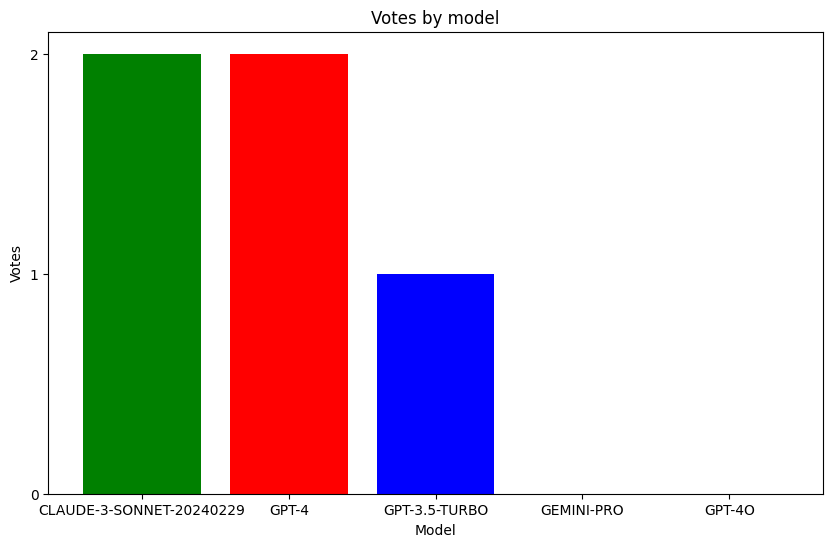

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))  
colors = ['green', 'red', 'blue', 'yellow', 'turquoise']  
plt.bar(df_aggregated['Model'], df_aggregated['Votes'], color=colors)  
plt.xlabel('Model')  
plt.ylabel('Votes')  
plt.title('Votes by model')  
x_positions = range(len(df_aggregated['Model']))  
plt.xticks(x_positions, [label.upper() for label in df_aggregated['Model']], rotation=0)  
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()